# K nearest neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x, y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h: X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1. Read the problem statement.

2. Get the dataset.

3. Explore the dataset.

4. Pre-processing of dataset.

5. Visualization

6. Transform the dataset for building machine learning model.

7. Split data into train, test set.

8. Build Model.

9. Apply the model.

10. Evaluate the model.

11. Finding Optimal K value

12. Repeat 7, 8, 9 steps.

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Download the dataset here:**
- https://www.kaggle.com/uciml/iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Load data

### Question 1

Import the data set and print 10 random rows from the data set

Hint: use **sample()** function to get random rows

In [277]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.metrics import accuracy_score
from sklearn import metrics


In [278]:
dataRow=pd.read_csv("iris (1).csv")
dataRow.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
86,87,6.7,3.1,4.7,1.5,Iris-versicolor
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica
128,129,6.4,2.8,5.6,2.1,Iris-virginica
25,26,5.0,3.0,1.6,0.2,Iris-setosa
132,133,6.4,2.8,5.6,2.2,Iris-virginica
140,141,6.7,3.1,5.6,2.4,Iris-virginica
83,84,6.0,2.7,5.1,1.6,Iris-versicolor
89,90,5.5,2.5,4.0,1.3,Iris-versicolor
47,48,4.6,3.2,1.4,0.2,Iris-setosa


## Data Pre-processing

### Question 2 - Estimating missing values

Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

Calculate the number of missing values per column
- don't use loops

In [279]:
dataRow.isna().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

Fill missing values with median of that particular column

In [280]:
dataRow.fillna(dataRow.median(), inplace=True)

### Question 3 - Dealing with categorical data

Change all the classes to numericals (0 to 2)

Hint: use **LabelEncoder()**

In [281]:
from sklearn.preprocessing import LabelEncoder
class_label_encoder = LabelEncoder()

In [282]:
dataRow['Species']=class_label_encoder.fit_transform(dataRow.Species)
print(dataRow)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0      1            5.1           3.5           1.40           0.2        0
1      2            4.9           3.0           1.40           0.2        0
2      3            4.7           3.2           1.30           0.2        0
3      4            4.6           3.1           1.50           0.2        0
4      5            5.0           3.6           1.40           0.2        0
5      6            5.4           3.9           1.70           0.4        0
6      7            4.6           3.4           1.40           0.3        0
7      8            5.0           3.4           1.50           0.2        0
8      9            4.4           2.9           1.40           0.2        0
9     10            4.9           3.1           1.50           0.1        0
10    11            5.4           3.7           1.50           0.2        0
11    12            4.8           3.4           1.60           0.2        0
12    13    

### Question 4

Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

Hint: use **corr()**

In [283]:
dataRow.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [284]:
dataRow.corr()
dataRow=dataRow.drop(labels='SepalWidthCm', axis=1)
dataRow.head()

,Id,SepalLengthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,1.4,0.2,0
1,2,4.9,1.4,0.2,0
2,3,4.7,1.3,0.2,0
3,4,4.6,1.5,0.2,0
4,5,5.0,1.4,0.2,0


### Question 5

Observe the independent variables variance and drop such variables having no variance or almost zero variance (variance < 0.1). They will be having almost no influence on the classification

Hint: use **var()**

In [285]:
x=dataRow.var()
dataRow.loc[:,dataRow.var()>0.1]
dataRow.head()

,Id,SepalLengthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,1.4,0.2,0
1,2,4.9,1.4,0.2,0
2,3,4.7,1.3,0.2,0
3,4,4.6,1.5,0.2,0
4,5,5.0,1.4,0.2,0


### Question 6

Plot the scatter matrix for all the variables.

Hint: use **pandas.plotting.scatter_matrix()**

you can also use pairplot()

C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


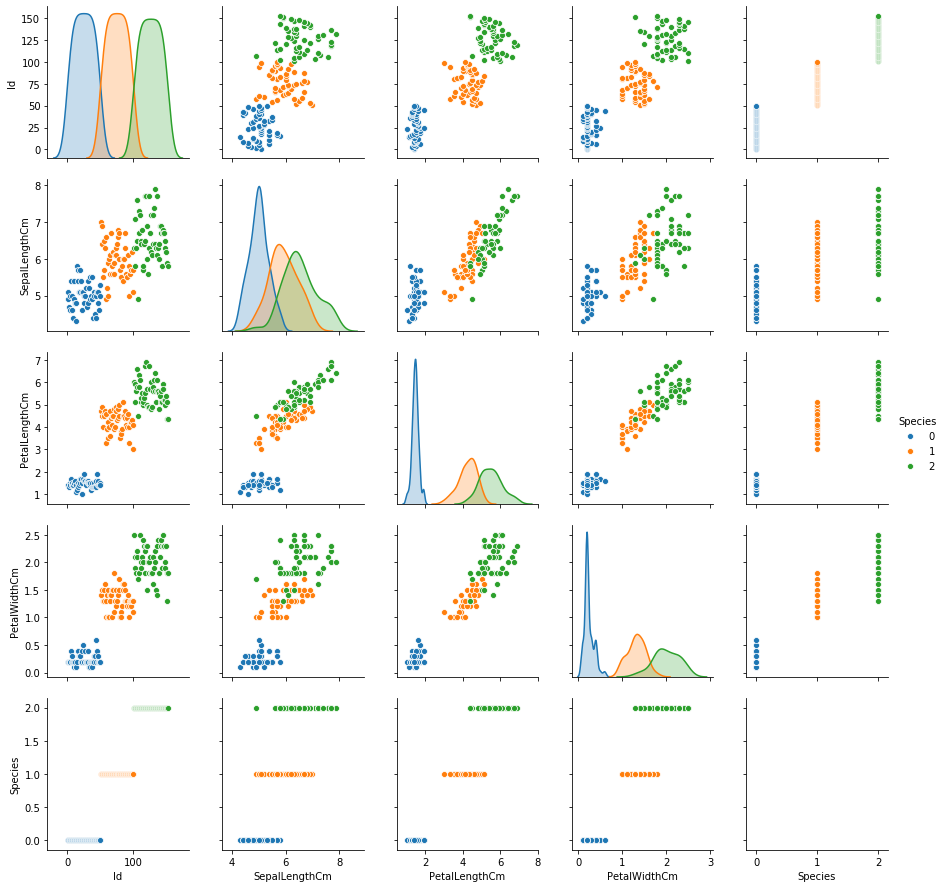

In [286]:
import seaborn as sns
sns.pairplot(dataRow, diag_kind='kde', hue='Species')


## Split the dataset into training and test sets


### Question 7

Split the dataset into training and test sets with 80-20 ratio

Hint: use **train_test_split()**

In [287]:
dataRow = dataRow.drop(labels = "Id", axis = 1)

In [288]:
X = dataRow.drop(labels= "Species" , axis = 1)

In [289]:
y=dataRow.Species

In [290]:
from scipy.stats import zscore
X = X.apply(zscore)

In [291]:

test_size = 0.20 
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [292]:
X_train.shape

(121, 3)

In [293]:
X_test.shape

(31, 3)

## Build Model

### Question 8

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [294]:
NNH = KNeighborsClassifier(k)
NNH.fit(X_train, y_train)
predicted_labels = NNH.predict(X_test)
NNH.score(X_train, y_train)
NNH.score(X_test, y_test)

0.967741935483871

In [295]:
cv_scores =[]
for k in [3,5,9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
cv_scores

[0.9512820512820512, 0.9429487179487179, 0.9429487179487179]

## Find optimal value of K

### Question 9 - Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [317]:

import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
maxK = int(np.sqrt(X_train.shape[0]))
maxK

myList = list(range(1,12))

neighbors = list(filter(lambda x: x % 2 != 0, myList))
neighbors


[1, 3, 5, 7, 9, 11]

In [319]:
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
cv_scores

cv_scores = pd.DataFrame([], columns = ['k' , 'accuracy']) 



[0.9498834498834497,
 0.9512820512820512,
 0.9429487179487179,
 0.9346153846153846,
 0.9429487179487179,
 0.9512820512820512]

In [320]:
misError = [1 - x for x in cv_scores]
optimal_k = neighbors[misError.index(min(misError))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 3


## Plot accuracy

### Question 10

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

In [ ]:
import matplotlib.pyplot as plt

plt.bar(cv_scores.k,cv_scores.accuracy)
plt.xticks(cv_scores.k)
plt.xlabel('k')
plt.title ("K vs accuracy")
plt.ylabel('accuracy')
plt.show() 

# Breast cancer dataset

## Read data

### Question 1
Read the data given in bc2.csv file

In [296]:
DataBC2=pd.read_csv("bc2.csv")
DataBC2.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Data preprocessing

### Question 2
Observe the no.of records in dataset and type of each column

In [300]:
DataBC2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


### Question 3
Use summary statistics to check if missing values, outlier and encoding treament is necessary

Hint: use **describe()**

In [301]:
DataBC2.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


#### Check Missing Values

In [304]:
DataBC2.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

### Question 4
#### Check how many `?` are there in Bare Nuclei feature (they are also unknown or missing values). 

In [311]:
(DataBC2['Bare Nuclei']=="?").sum()

16

#### Replace them with the 'top' value of the describe function of Bare Nuclei feature

Hint: give value of parameter include='all' in describe function

In [337]:
toremove=DataBC2.describe(include='all')
toploc= toremove.loc['top','Bare Nuclei']
DataBC2['Bare Nuclei']=DataBC2['Bare Nuclei'].replace("?", toploc)
DataBC2

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


### Question 5
#### Find the distribution of target variable (Class) 

In [323]:
DataBC2.groupby(['Class']).count()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
Class,,,,,,,,,,
2,458,458,458,458,458,458,458,458,458,458
4,241,241,241,241,241,241,241,241,241,241


#### Plot the distribution of target variable using histogram

In [328]:
import matplotlib as plt


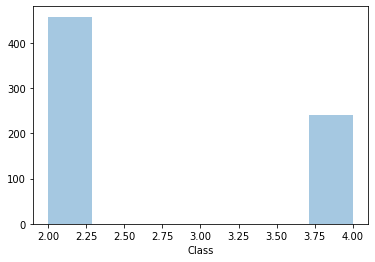

In [331]:
sns.distplot(DataBC2['Class'],kde=False,bins=7)

#### Convert the datatype of Bare Nuclei to `int`

In [338]:
DataBC2.loc[:,"Bare Nuclei"] = pd.to_numeric(DataBC2.loc[:,"Bare Nuclei"]) 

## Scatter plot

### Question 6
Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

## Train test split

### Question 7
#### Divide the dataset into feature set and target set

#### Divide the Training and Test sets in 70:30 

## Scale the data

### Question 8
Standardize the data

Hint: use **StandardScaler()**

## Build Model

### Question 9

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

## Find optimal value of K

### Question 10
Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

## Plot accuracy

### Question 11

Plot accuracy score vs k (with k value on X-axis) using matplotlib.